In [1]:
#importing some librairies

import numpy as np # for linear algebra
import pandas as pd # for data processing, CSV file I/O(e.g. pd.read_csv)
import matplotlib.pyplot as plt #for Matlab-style plotting
import seaborn as sns # for making statistical graphics, data visualization
from scipy import stats
from scipy.stats import norm, skew #for some satistics
from collections import defaultdict
%matplotlib inline
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # to ignore warning from sklearn and seabone

In [2]:
data = pd.read_csv('New_data_Set.csv')

In [3]:
# displays the first five rows of the dataset.
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Gender,Female,Female,Male,Female,Male,Male,Male,Female,Female,Male
Business,0,0,0,1,0,0,0,0,1,0
Dependancies,No,No,No,No,No,No,Yes,No,No,No
Calls,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
Type,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Month-to-month,Two year,Two year,One year,Month-to-month,Month-to-month
Billing,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Rating,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No
Age,18,19,22,21,23,23,23,24,24,43
Salary,5089,5698.12,5896.65,6125.12,6245,6444.23,6455.5,6458.36,6529.23,6682.33
Base_pay,2035.6,2279.25,2358.66,2450.05,2498,2577.69,2582.2,2583.34,2611.69,2672.93


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

In [5]:
data.shape #for finding out the number of rows and columns

(5000, 20)

In [6]:
# This function returns the count, mean, standard deviation, minimum and maximum values
data.describe()

,Business,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
count,5000.000000,5000.000000,5000.000000,4977.000000,5000.000000,5000.000000,5.000000e+03,3524.000000,5000.000000,5000.000000,5000.00000,5000.00000
mean,0.160000,51.865000,99821.928553,40046.187707,4991.096428,51.258522,6.761260e+06,43.922020,43.577828,43.034129,64.84151,32.18480
std,0.366643,8.560691,25376.961744,10135.686075,1268.848087,52.244022,1.620476e+07,38.361497,37.148512,36.760641,30.13968,24.63673
min,0.000000,18.000000,5089.000000,2035.600000,254.450000,1.440000,0.000000e+00,3.680000,3.680000,3.650000,18.25000,0.00000
25%,0.000000,47.000000,83890.338980,33720.552420,4194.516950,25.727500,1.283850e+06,22.098750,21.990000,21.718750,35.50000,8.00000
50%,0.000000,52.000000,100579.378500,40282.016040,5028.968925,39.205000,2.870600e+06,33.119999,33.340000,32.880001,70.50000,28.00000
75%,0.000000,57.000000,116912.092475,46792.232410,5845.604624,58.715000,6.247100e+06,51.421839,51.117500,50.415000,89.95000,55.00000
max,1.000000,88.000000,199970.740000,79988.296000,9998.537000,629.511067,3.208684e+08,313.903904,313.688694,312.432438,118.75000,72.00000


In [7]:
data.Business.unique()

array([0, 1], dtype=int64)

In [8]:
data.Age.unique()

array([18, 19, 22, 21, 23, 24, 43, 44, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 45, 39, 40, 41, 42, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       73, 74, 75, 76, 20, 26, 25, 78, 88, 72, 80, 82, 85, 79],
      dtype=int64)

In [9]:
data.Volume.unique()

array([21226600, 10462800, 18761000, ...,  7949400,  3908400,  6003300],
      dtype=int64)

In [10]:
data.Months.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72], dtype=int64)

In [11]:
data.Business.value_counts()

0    4200
1     800
Name: Business, dtype: int64

In [12]:
data.Age.value_counts()

50    256
53    254
55    248
54    245
51    244
     ... 
78      2
80      1
85      1
82      1
79      1
Name: Age, Length: 65, dtype: int64

In [13]:
data.Months.value_counts().sum()

5000

In [14]:
data.Volume.value_counts()

779500       4
548000       4
1443400      3
1346400      3
598200       2
            ..
425200       1
5526800      1
3380500      1
130463000    1
2457600      1
Name: Volume, Length: 4831, dtype: int64

In [15]:
data.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [16]:
# removing Null Entries
data.dropna(axis=0,inplace=True)
data # (If there are null entries)

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.0000,2035.60000,254.450000,3.770000,21226600,3.750000,3.760000,3.650000,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.1200,2279.24800,284.906000,3.740000,10462800,3.850000,3.680000,3.650000,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.6500,2358.66000,294.832500,3.890000,18761000,4.230000,4.290000,3.720000,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.1200,2450.04800,306.256000,4.350000,66130600,4.260000,4.310000,3.830000,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.0000,2498.00000,312.250000,4.340000,26868200,4.790000,4.410000,4.080000,18.80,19.05,1,High School or less
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,Female,0,No,Yes,Month-to-month,Yes,Yes,52,113796.2655,45518.50620,5689.813275,49.250000,975200,305.760010,308.959991,47.619999,85.80,3143.65,39,PG
3520,Female,0,Yes,Yes,Two year,No,No,52,113802.0051,45520.80206,5690.100255,47.849998,846100,308.010010,302.994813,47.410000,85.85,3145.15,39,PG
3521,Female,0,No,Yes,Month-to-month,No,No,52,113812.5766,45525.03062,5690.628830,47.950001,6627700,308.899994,312.205308,46.549999,85.90,3145.9,39,PG
3522,Male,0,Yes,Yes,Two year,Yes,No,52,113816.1097,45526.44386,5690.805485,49.110001,900900,308.959991,310.830459,47.540001,85.90,3147.15,39,PG


In [17]:
data.duplicated().sum()

0

# VISUALISE & ANALYSIS THE DATA

In [18]:
data.Gender.value_counts()

Male      1760
Female    1735
Name: Gender, dtype: int64

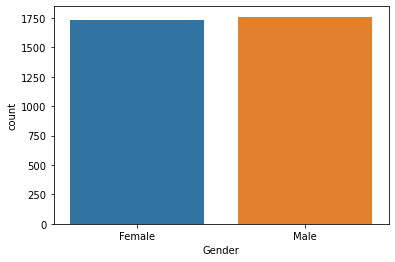

In [19]:
# Using Countplot to count number of males and females in the dataset.
sns.countplot(data.Gender)
plt.show()

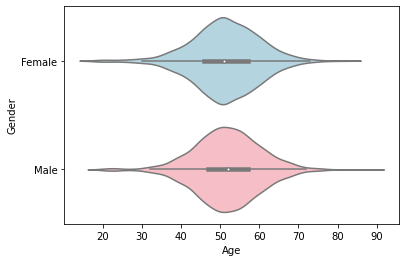

In [20]:
# Using Violinplot to Analysis Age by the Gender

sns.violinplot("Age", "Gender", data=data,
              palette=["lightblue" , "lightpink"]);

# it shows the gender's age has 40 to 50+ for the person 

In [21]:
(data.Age > 50).sum()

1926

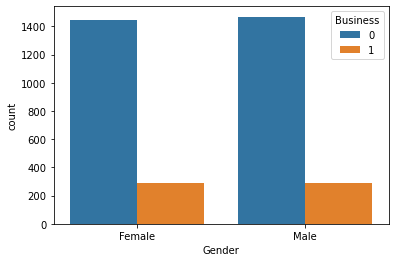

In [22]:
# ‘hue’ is used to visualize the effect of an additional variable to the current distribution.
sns.countplot(data.Gender, hue=data['Business'])
plt.show()

Text(0, 0.5, 'Gender')

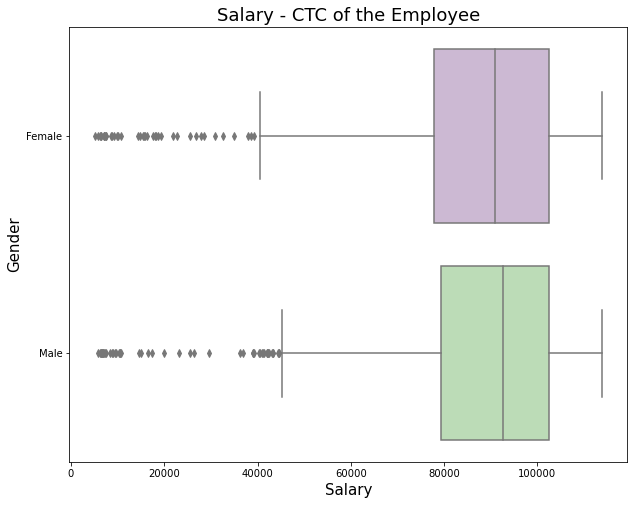

In [23]:
# Using Boxplot for visualize the CTC of the Emplayee
plt.figure(figsize=(10,8))
ax=sns.boxplot(x="Salary",y="Gender",data=data,palette="PRGn")
ax.set_title("Salary - CTC of the Employee",fontsize=18)
ax.set_xlabel("Salary",fontsize=15)
ax.set_ylabel("Gender",fontsize=15)

# it show the higher salary range between Male & Female.

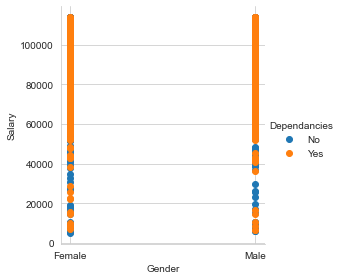

In [24]:
# using whitegrid to visualize the Dependancies by Gender and Salary
#The parameter hue, in the FacetGrid decides the color of each datapoints
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Dependancies", size=4) \
   .map(plt.scatter, "Gender", "Salary") \
   .add_legend()
plt.show()

# it shows that male has more yes in Dependancies.

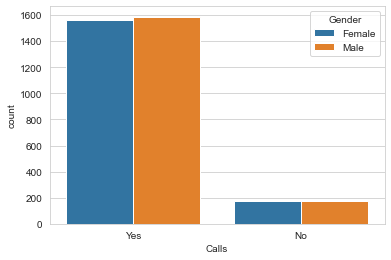

In [25]:
#Calls - if the person has authority to make calls or not
sns.countplot(data.Calls, hue=data['Gender'])
plt.show()

Text(0.5, 1.0, 'Months - duration of the person employed with the company')

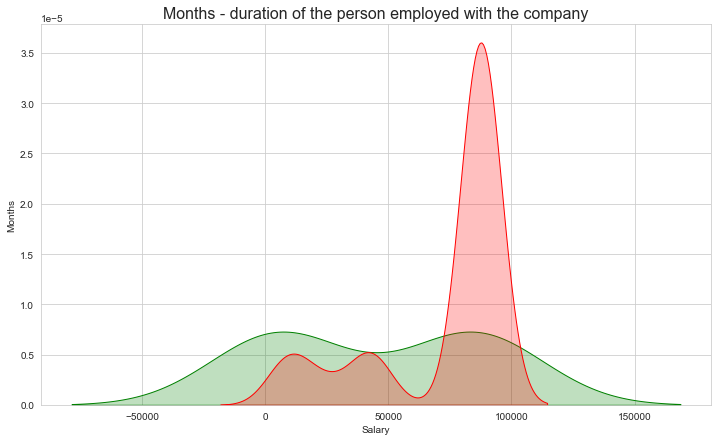

In [26]:
# The seaborn. kdeplot() function is used to plot the data against a single/univariate variable

# Months - duration of the person employed with the company

plt.figure(figsize=(12,7))
ax=sns.kdeplot(data.loc[(data.Months==0),'Salary'],color="g",shade=True,label="Salary")
ax=sns.kdeplot(data.loc[(data.Months==1),'Salary'],color="r",shade=True,label="Months")
ax.set(xlabel='Salary',ylabel="Months")
plt.title("Months - duration of the person employed with the company",fontsize=16)

#From the plot,it is understood that there is an increasing trend of turnover

Text(0.5, 1.0, 'Calls - if the person has authority to make calls or not')

<Figure size 864x576 with 0 Axes>

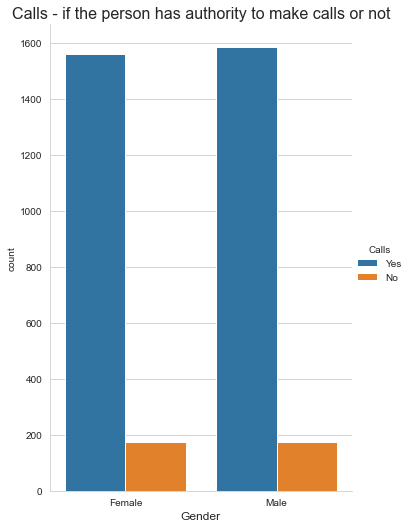

In [27]:
#its show most calls are make by males.
fig=plt.figure(figsize=(12,8))
g=sns.factorplot(x="Gender",hue="Calls",data=data,kind="count",legend_out=True,size=7,aspect=0.7)
g._legend.set_title("Calls")
plt.xlabel("Gender",fontsize=12)
plt.title("Calls - if the person has authority to make calls or not",fontsize=16)

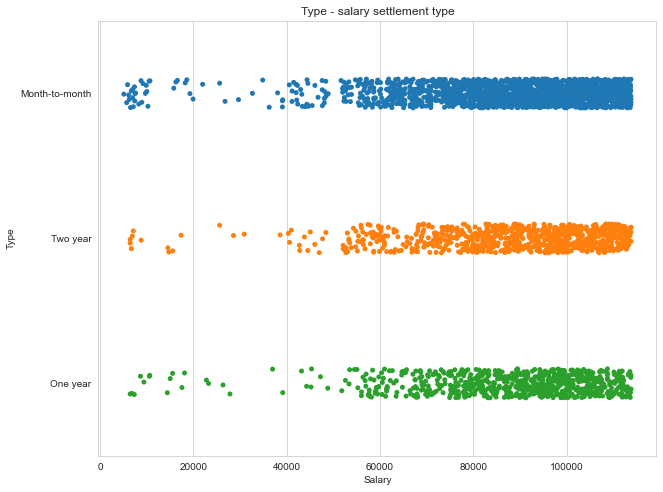

In [28]:
# Using Strip plot to visualize the data.  
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(data['Salary'], data['Type'], jitter=True, ax=ax)  
ax.set_title('Type - salary settlement type')  
plt.show() 

#Strip plot showing the distribution of the earnings based on the number of Type.
# It seems that Most of salary Settlement type are Months to Months

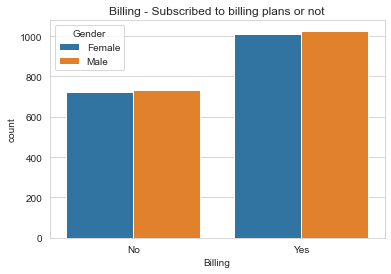

In [29]:
sns.countplot(data.Billing, hue=data['Gender'])
plt.title('Billing - Subscribed to billing plans or not')
plt.show()
# its shows the most billing has a subscribed.

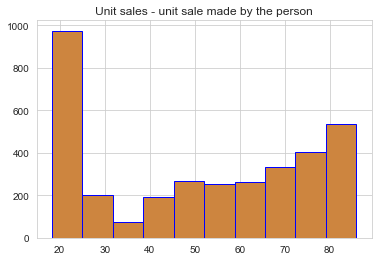

In [30]:
# its Show that Mostly unit sales has 20 by the person.


plt.hist(data['Unit_Sales'],
        facecolor = 'peru',
        edgecolor = 'blue',
        bins = 10)
plt.title('Unit sales - unit sale made by the person')
plt.show()

Text(0.5, 1.0, 'Rating - If he has been given a rating by a superior or not')

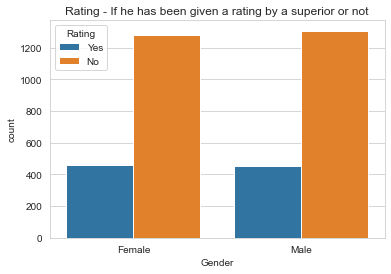

In [31]:
#its show that male Rating has No most of the time.
sns.countplot(data.Gender, hue=data['Rating'])
plt.title('Rating - If he has been given a rating by a superior or not')

Text(0.5, 1.0, 'Bonus - amount received by a person as bonus for sales')

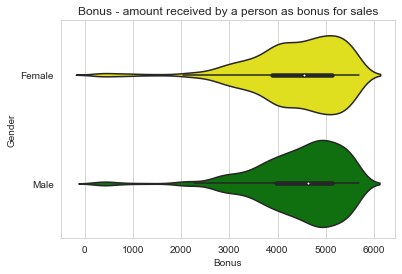

In [32]:
sns.violinplot("Bonus", "Gender", data=data,
              palette=["yellow" , "green"]);
plt.title('Bonus - amount received by a person as bonus for sales') 

# its show that the amount received by a person as bonus btw 4000 to 6000 for sales

Text(0.5, 1.0, 'Base pay - Base pay of the employee')

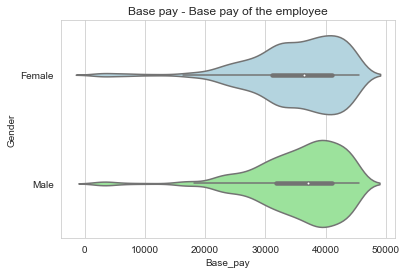

In [33]:
sns.violinplot("Base_pay", "Gender", data=data,
              palette=["lightblue" , "lightgreen"]);
plt.title('Base pay - Base pay of the employee')

# Its show that the Base pay of the employee is around 40000

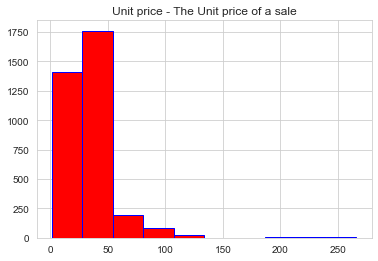

In [34]:
plt.hist(data['Unit_Price'],
        facecolor = 'red',
        edgecolor = 'blue',
        bins = 10)
plt.title('Unit price - The Unit price of a sale')
plt.show()

# Its Show that Unit Price of a sales has 4000

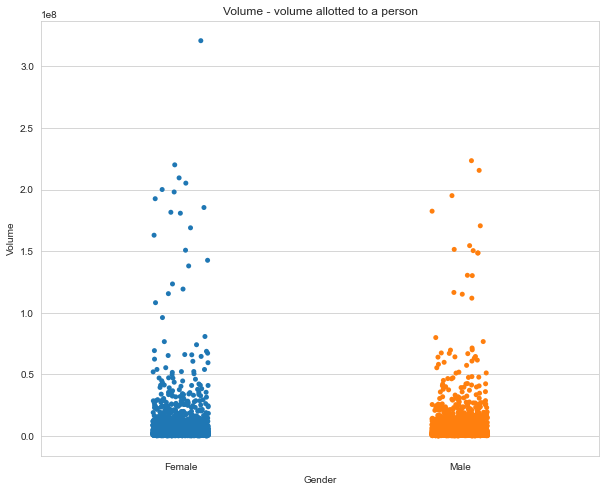

In [35]:
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(data['Gender'], data['Volume'], jitter=True, ax=ax)  
ax.set_title('Volume - volume allotted to a person')  
plt.show() 

# Most of the volume allotted to a females

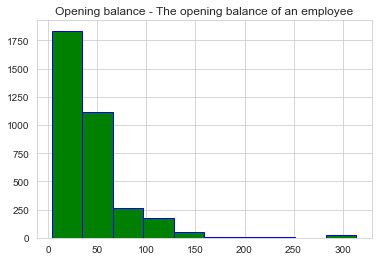

In [36]:
plt.hist(data['openingbalance'],
        facecolor = 'green',
        edgecolor = 'blue',
        bins = 10)
plt.title('Opening balance - The opening balance of an employee')
plt.show()

# Its Show that Opening Balance Has 1750 for an employee.

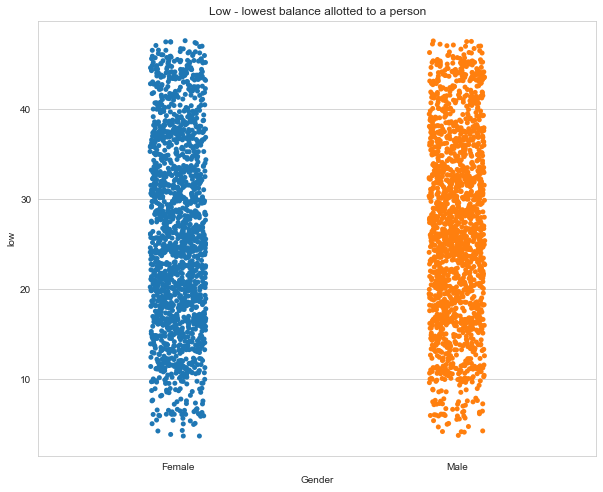

In [37]:
# Most of the lowest balance allotted to a males

fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(data['Gender'], data['low'], jitter=True, ax=ax)  
ax.set_title('Low - lowest balance allotted to a person')  
plt.show()


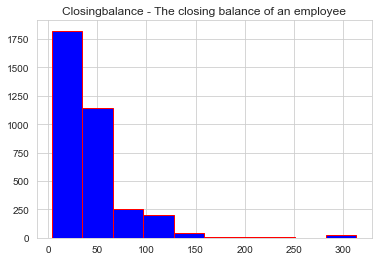

In [38]:
plt.hist(data['closingbalance'],
        facecolor = 'blue',
        edgecolor = 'red',
        bins = 10)
plt.title('Closingbalance - The closing balance of an employee')
plt.show()

#its show that most closing balance is 2500

Text(0.5, 1.0, 'Education- Educational background of an employee')

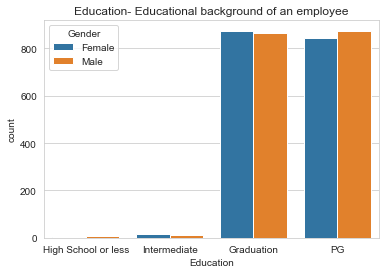

In [39]:
sns.countplot(data.Education, hue=data['Gender'])
plt.title('Education- Educational background of an employee')

#its show that the Educational background of an employee as PG
# Mostly PG has done by the males